# Data-Driven Monte Carlo Simulation

## Input Analysis 

Observation data can help us build stronger simulation models. However, this requires making a determinination of which distribution model best fits our data so we can use the best distribution in our simulation. 

In [14]:
data = read.csv("Data Sets/windTurbineData.csv")

### Determining Distribution Model 

The observations available in our wind turbine dataset represent:
- "FailCount": the count of the number of failures on a windmill turbine farm per year
- "RepairTime": the time that it takes to repair a windmill turbine on each occurrence in minutes.
- "DriveTime": the time that it takes to notice the failure and drive from the control station to the windmill turbine in minutes

Recommend an input distribution model for the "FailCount," "RepairTime," and "DriveTime" variables. Also, determine the distributions' parameters (For example, if data is Normal, what is the approximate mean and stdev; or if the data is Uniform, what are the minimum and maximum parameters).

The histogram of of failures reveals it to be right-skewed and unimodal.

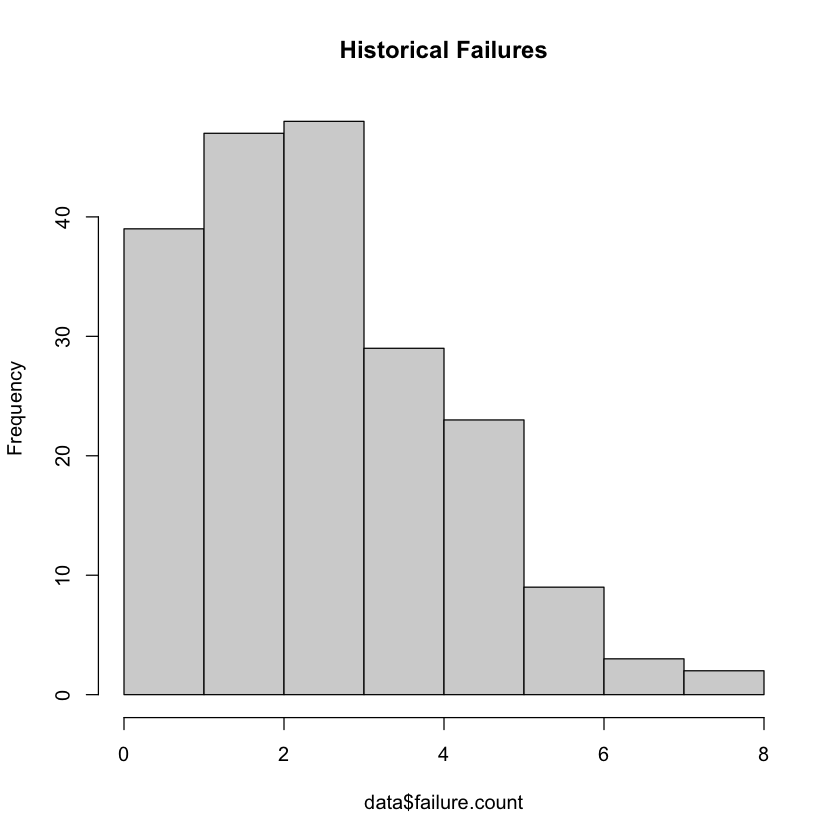

In [15]:
hist(data$failure.count, main="Historical Failures")

The time-series plot does not reveal any noticeable trends.

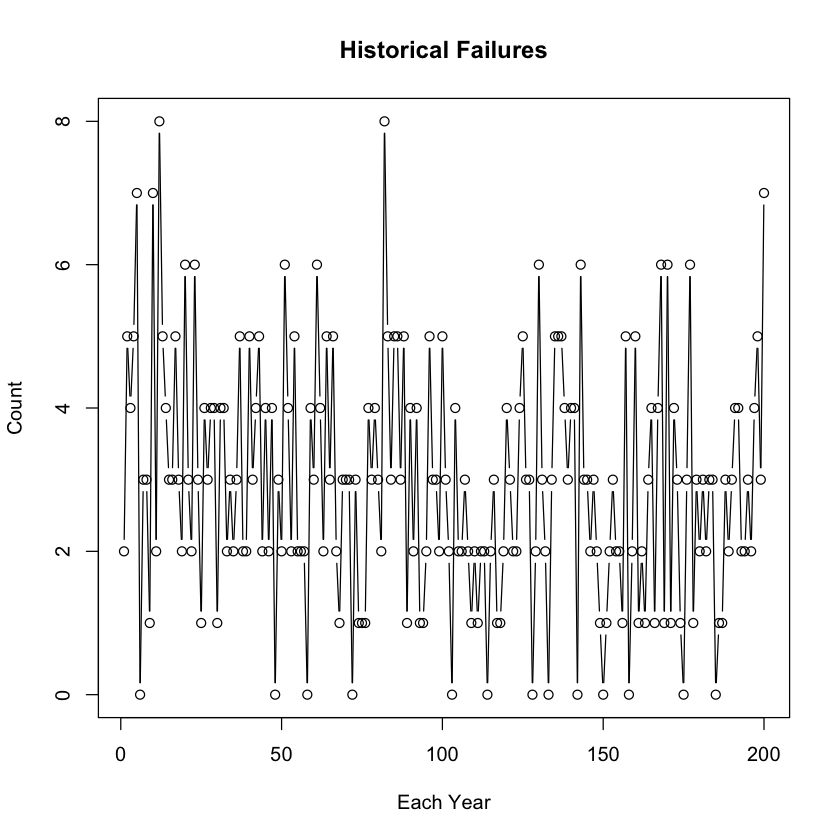

In [16]:
plot(data$failure.count, type="b", main="Historical Failures", ylab = "Count", xlab = "Each Year")

The autocorrelation plot shows one lag outside the confidence band, but otherwise the data appears stationary. 

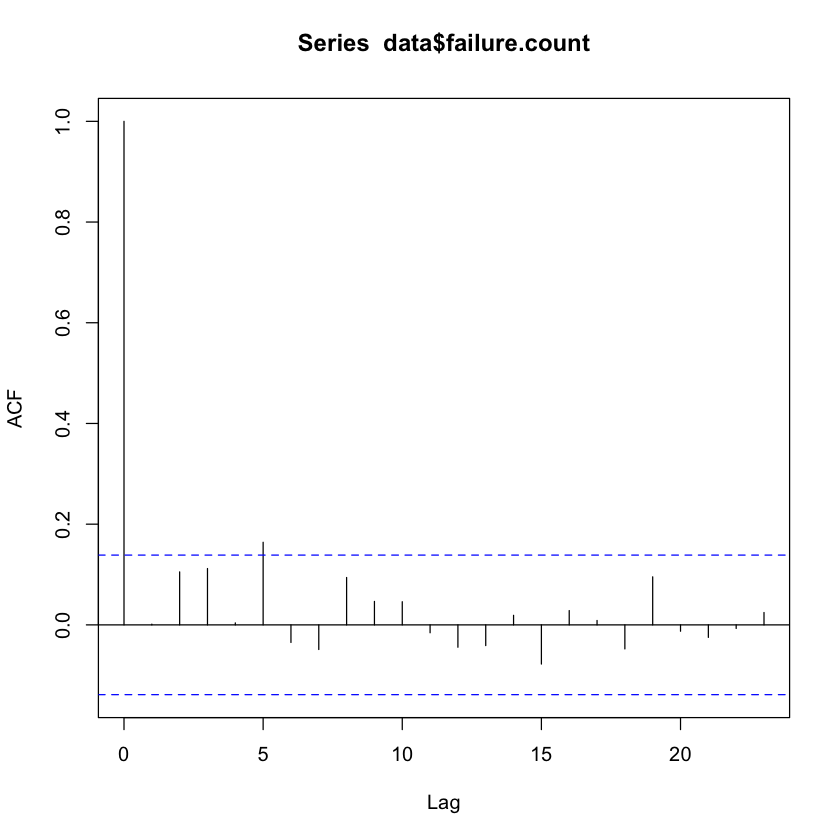

In [17]:
acf(data$failure.count)

In [ ]:
library(fitdistrplus)

summary statistics
------
min:  0   max:  8 
median:  3 
mean:  2.93 
estimated sd:  1.688001 
estimated skewness:  0.4338968 
estimated kurtosis:  2.989638 

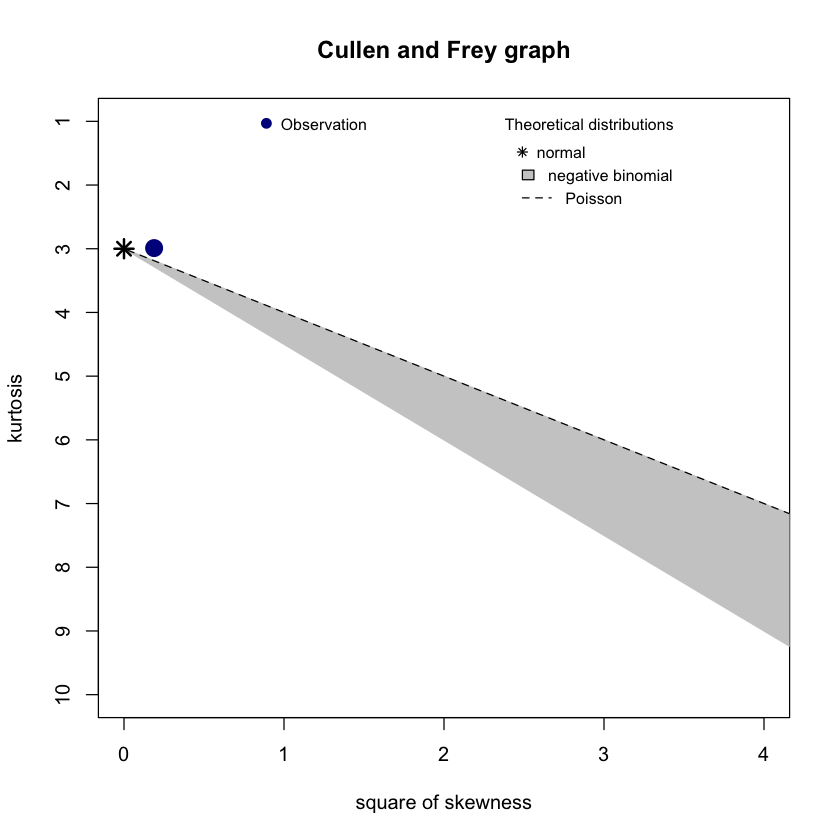

In [19]:
descdist(data$failure.count, discrete = TRUE)

First, check negative binomial and Poisson.

In [20]:
fit.nbinom = fitdist(data$failure.count, "nbinom")

In [24]:
summary(fit.nbinom)
gofstat(fit.nbinom)

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
         estimate Std. Error
size 1.222852e+06 61.1606955
mu   2.929835e+00  0.1210305
Loglikelihood:  -382.9048   AIC:  769.8096   BIC:  776.4062 
Correlation matrix:
             size           mu
size 1.000000e+00 1.051932e-07
mu   1.051932e-07 1.000000e+00


Chi-squared statistic:  1.784626 
Degree of freedom of the Chi-squared distribution:  3 
Chi-squared p-value:  0.6182862 
Chi-squared table:
     obscounts theocounts
<= 1  39.00000   41.97530
<= 2  47.00000   45.84320
<= 3  48.00000   44.77097
<= 4  29.00000   32.79290
<= 5  23.00000   19.21557
> 5   14.00000   15.40206

Goodness-of-fit criteria
                               1-mle-nbinom
Akaike's Information Criterion     769.8096
Bayesian Information Criterion     776.4062

In [23]:
fit.pois = fitdist(data$failure.count, "pois")
summary(fit.pois)
gofstat(fit.pois)

Fitting of the distribution ' pois ' by maximum likelihood 
Parameters : 
       estimate Std. Error
lambda     2.93  0.1210372
Loglikelihood:  -382.9048   AIC:  767.8095   BIC:  771.1079 

Chi-squared statistic:  1.78401 
Degree of freedom of the Chi-squared distribution:  4 
Chi-squared p-value:  0.7754066 
Chi-squared table:
     obscounts theocounts
<= 1  39.00000   41.97007
<= 2  47.00000   45.84082
<= 3  48.00000   44.77120
<= 4  29.00000   32.79491
<= 5  23.00000   19.21782
> 5   14.00000   15.40518

Goodness-of-fit criteria
                               1-mle-pois
Akaike's Information Criterion   767.8095
Bayesian Information Criterion   771.1079

The slightly higher Chi-squared p-value and lower AIC/BIC values of Poisson compared to negative binomial indicate that **Poisson is likely a better fit for our data with a lambda estimate of 2.93.**

As the data appears discrete, we will dispense with the continuous tests.

Next we will examine the repair and drive time variables in this dataset. The data for these variables and the nature of what they're capturing (time) indicate they are likely continuous variables. We'll start with those distribution models first.

Yes, repair is misspelled. This isn't my fault, I swear.

summary statistics
------
min:  5.8   max:  14.9 
median:  10 
mean:  10.0495 
estimated sd:  1.511962 
estimated skewness:  0.1078961 
estimated kurtosis:  3.113694 

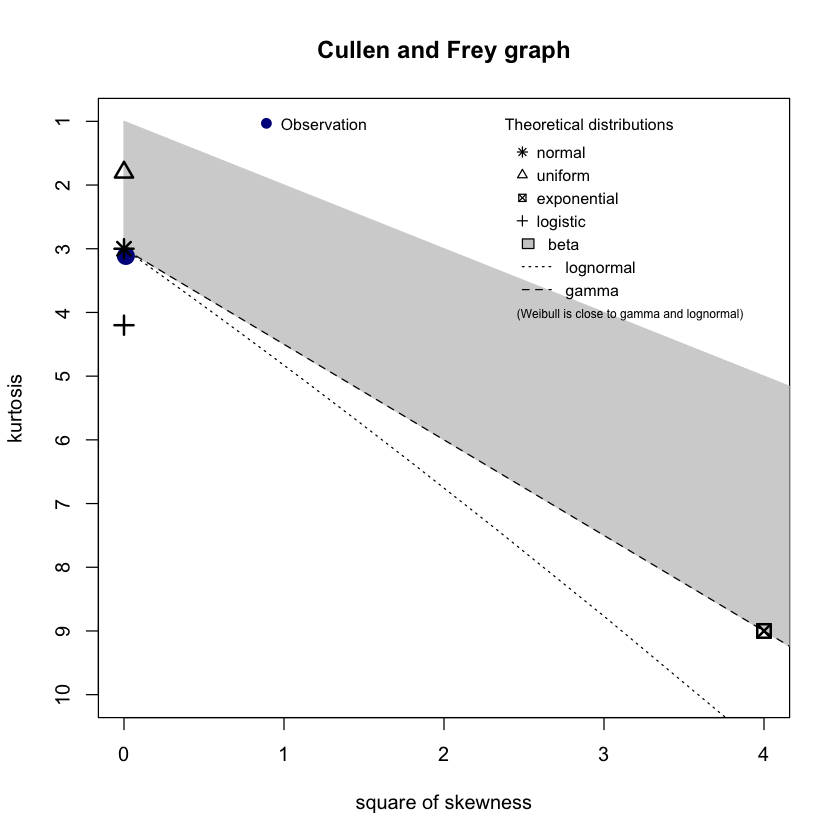

In [25]:
descdist(data$rapair.time, discrete = FALSE)

The best possible distirbutions look to be normal, lognormal, gamma, and weibull. Summarizing these all at once, **the data for repair time best appears to be normally distributed with a mean of 10.05 and standard deviation of 1.508.**

In [26]:
fit.norm <- fitdist(data$rapair.time, "norm")
summary(fit.norm)

fit.lnorm <- fitdist(data$rapair.time, "lnorm")
summary(fit.lnorm)

fit.gamma <- fitdist(data$rapair.time, "gamma")
summary(fit.gamma)

fit.weibull <- fitdist(data$rapair.time, "weibull")
summary(fit.weibull)

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 10.049500 0.10664426
sd    1.508178 0.07540873
Loglikelihood:  -365.9681   AIC:  735.9362   BIC:  742.5329 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


Fitting of the distribution ' lnorm ' by maximum likelihood 
Parameters : 
         estimate Std. Error
meanlog 2.2959775 0.01084708
sdlog   0.1534009 0.00766858
Loglikelihood:  -368.0431   AIC:  740.0863   BIC:  746.6829 
Correlation matrix:
        meanlog sdlog
meanlog       1     0
sdlog         0     1


Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape 43.454570   4.328873
rate   4.324012   0.433241
Loglikelihood:  -366.5354   AIC:  737.0708   BIC:  743.6675 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9942526
rate  0.9942526 1.0000000


Fitting of the distribution ' weibull ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape  7.077176  0.3665029
scale 10.699577  0.1131761
Loglikelihood:  -372.9337   AIC:  749.8674   BIC:  756.4641 
Correlation matrix:
          shape     scale
shape 1.0000000 0.3286808
scale 0.3286808 1.0000000


Finally, we will examine the drive time variable.

summary statistics
------
min:  16.6   max:  29.7 
median:  23.45 
mean:  23.372 
estimated sd:  3.844779 
estimated skewness:  0.008484737 
estimated kurtosis:  1.835217 

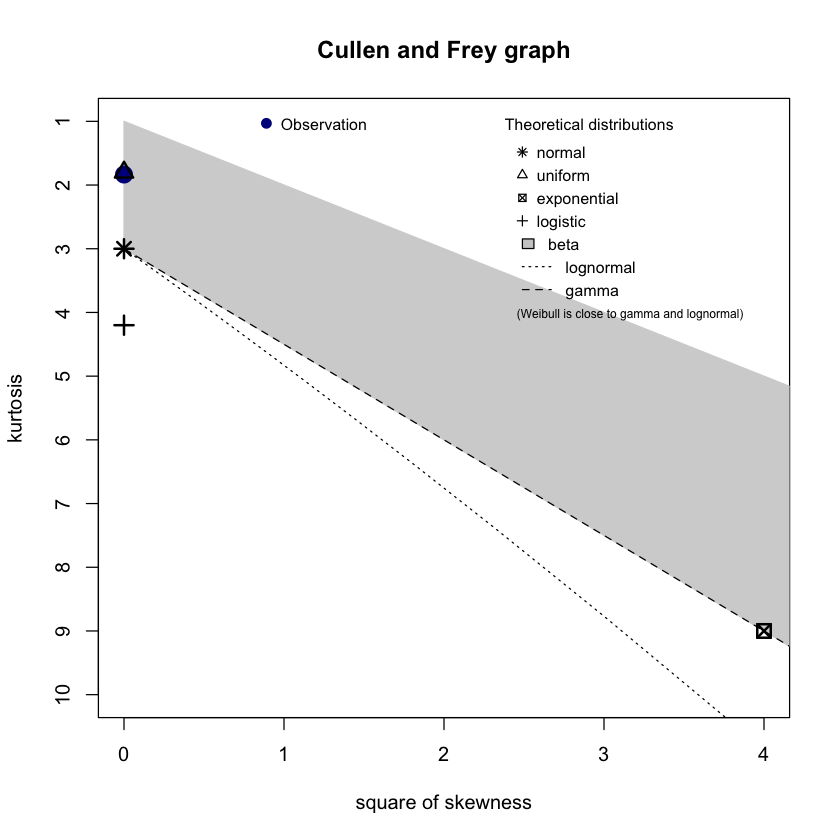

In [27]:
descdist(data$drive.time, discrete = FALSE)

From our skewness-kutosis plot, our observation appears to be a good match for a uniform distribution. We will also check normal and gamma distributions to rule them out.

**As expected, the uniform distribution best fits this data with a minimum estimate of 16.6 and maximum estimate of 29.7.** 

In [30]:
fit2.unif <- fitdist(data$drive.time, "unif")
summary(fit2.unif)

fit2.norm <- fitdist(data$drive.time, "norm")
summary(fit2.norm)

fit2.gamma <- fitdist(data$drive.time, "gamma")
summary(fit2.gamma)

Fitting of the distribution ' unif ' by maximum likelihood 
Parameters : 
    estimate Std. Error
min     16.6         NA
max     29.7         NA
Loglikelihood:  -514.5224   AIC:  1033.045   BIC:  1039.642 
Correlation matrix:
[1] NA


Fitting of the distribution ' norm ' by maximum likelihood 
Parameters : 
      estimate Std. Error
mean 23.372000  0.2711864
sd    3.835155  0.1917577
Loglikelihood:  -552.6297   AIC:  1109.259   BIC:  1115.856 
Correlation matrix:
     mean sd
mean    1  0
sd      0  1


Fitting of the distribution ' gamma ' by maximum likelihood 
Parameters : 
       estimate Std. Error
shape 36.415145  3.6248930
rate   1.558107  0.1561703
Loglikelihood:  -552.7892   AIC:  1109.578   BIC:  1116.175 
Correlation matrix:
          shape      rate
shape 1.0000000 0.9931428
rate  0.9931428 1.0000000


### Simulating with Determined Model

*We pay \\$2 per minute (\\$120 per hour) to the technician who fixes a wind turbine, and the payment includes DriveTime and RepairTime multiplied by the total number of failures. Use the distribution and parameters you determined through input analysis (in part a) to simulate the total income of the technician per year. Report histogram, mean, standard deviation, and 95% confidence interval.*

*Income-yearly = \\$2 * (Repairtime + DriveTime) * FailCount*

To create this model, we will use the distributions determined above for each variable:
- x = failcount, poisson
    - λ = 2.93
- y = repairtime, normal
    - mean = 10.05
    - standard deviation = 1.508
- z = drivetime, uniform
    - min = 16.6
    - max = 29.7

In [32]:
# Income function
incomeFun = function(x, y, z){
    2*(y+z)*x
}

num_sim = 1000

# failure count simulation
x_samples <- rpois(num_sim, lambda = 2.93)

# repair time simulation
y_samples <- rnorm(num_sim, mean = 10.05, sd = 1.508)

# drive time simulation
z_samples <- runif(num_sim, min = 16.6, max = 29.7)

# income values
total_income <- 2 * (y_samples + z_samples) * x_samples

The histogram of our total income is right-skewed and unimodal. The mean is reported as 190.165, and the standard deviation is 114.35.

[1] 190.1652

[1] 114.346

2.5%    97.5% 
  0.0000 452.8341

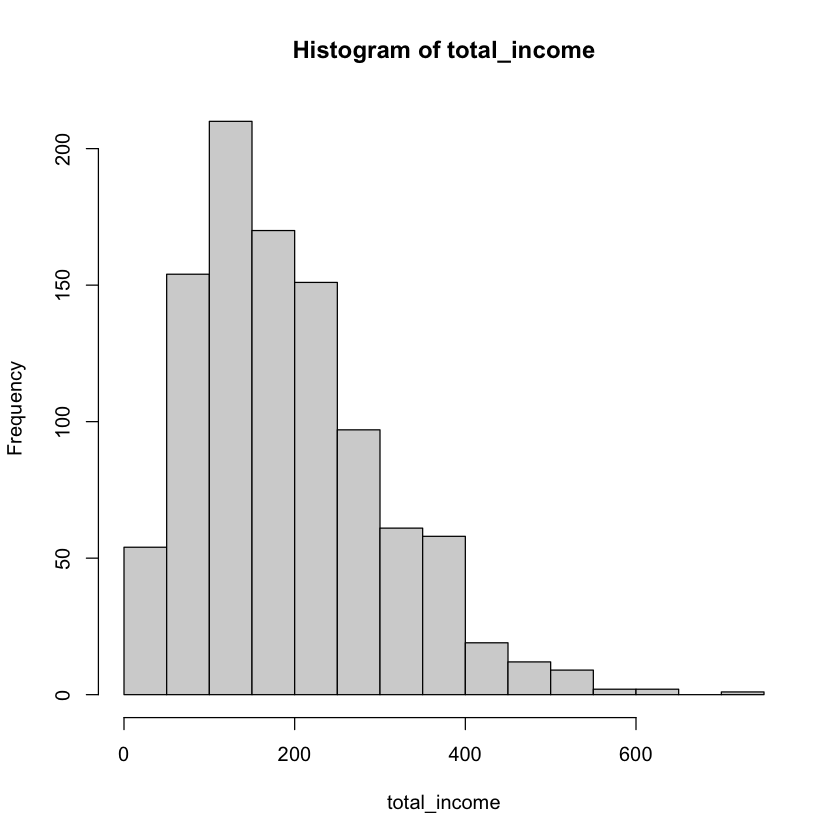

In [33]:
hist(total_income)
mean(total_income)
sd(total_income)
quantile(total_income, c(0.025, 0.975))

## Bootstrapping

Bootstrapping is a sampling method that involves resampling from our observed data. This is an extremely useful simulation technique, because it allows us to generate simulated data from real-world values.

Using bootstrapping, estimate the median and 95% confidence
interval for the median of the "income" variable in the " Prestige " dataset.

In [ ]:
library("car")
data("Prestige")
income <- Prestige$income

boot_median <- function(x){
  median(sample(x, replace = TRUE))
}

num_sim = 1000

boot_income_rep <- replicate(num_sim, boot_median(income))

In [4]:
quantile(boot_income_rep, c(0.025, 0.975))

2.5% 97.5% 
 5134  6894

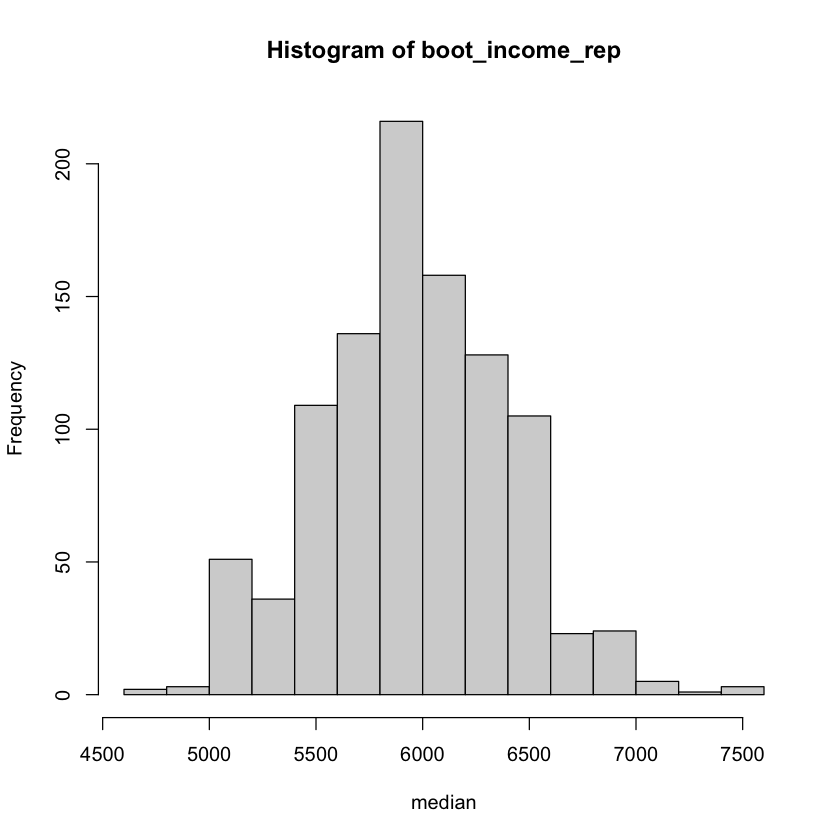

In [6]:
hist(boot_income_rep, xlab = "median")

## Bootstrapping Newsvendor Model

Use the Newsvendor Model to set up and run a bootstrap simulation assuming that we have access to a demand dataset in the last 100 days (the dataset is attached as newsVendorData.csv). Assume that the cost per unit (C) is \\$12, the selling price (R) is \$18, and the salvage value (S) is \\$10.

a) Suggest the optimal purchase quantity.
b) Visualize the profit outcome and report a 95% confidence interval for the optimal profit.


In [9]:
# Data
R = 18  # Selling price
C = 12  # Cost
S = 10   # Discount Price

# Model
# D = Units demanded
# Q = Quantity to be purchased (decision variables)
netProfitFun = function(D, Q, R, S, C){
  R*min(D,Q) + S * max(0, Q-D) - C*Q
}

In [10]:
newsdata = read.csv("Data Sets/newsvendordata.csv")
demanddata <- newsdata$demand

boot_mean <- function(x){
  mean(sample(x, replace = TRUE))
}

num_sim = 1000

boot_demand_rep <- replicate(num_sim, boot_mean(demanddata))

Qrange,expected_profits
40,239.4891
41,241.9836
42,240.8166
43,238.8468
44,236.8468
45,234.8468
46,232.8468
47,230.8468
48,228.8468
49,226.8468


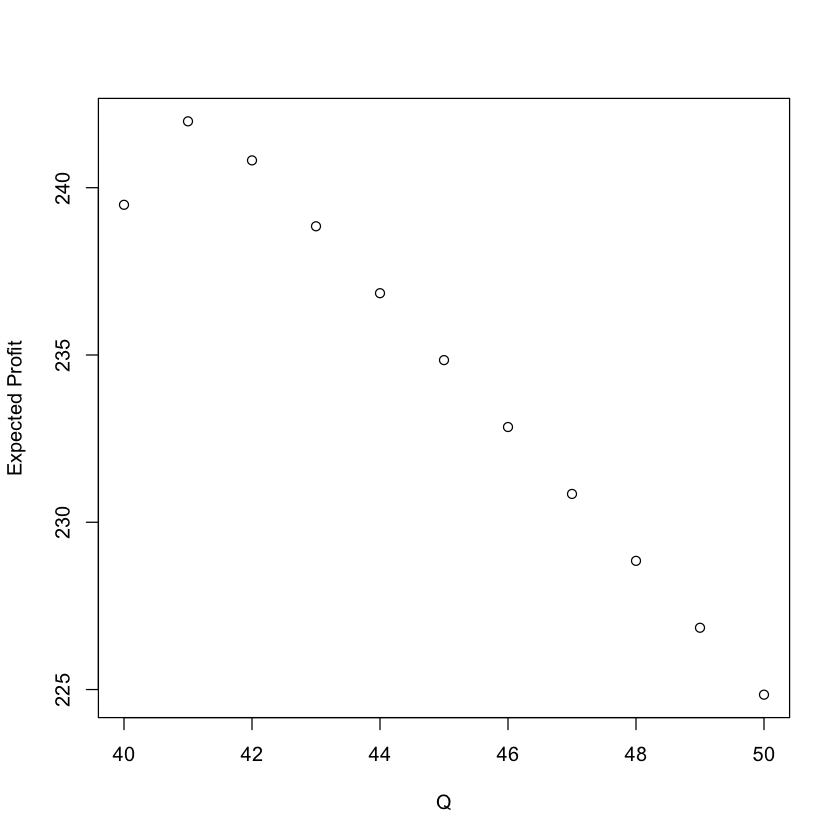

In [12]:
Qrange = 40:50

sim_D <- boot_demand_rep

profitMatrix <- matrix(nrow = num_sim, ncol = length(Qrange))

j = 0
for (Q in Qrange) {
  j = j+1
  for (i in 1:num_sim) {
    profitMatrix[i, j] = netProfitFun(sim_D[i], Q, R, S, C)  
  }
}

# Expected profit for each Q
expected_profits <- colMeans(profitMatrix)
cbind(Qrange, expected_profits)

plot(Qrange, colMeans(profitMatrix), ylab = "Expected Profit", xlab = "Q")

In [13]:
quantile(expected_profits, c(0.025, 0.975))

2.5%    97.5% 
225.3468 241.6918